# Homework2



## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from a mobile phone company concerned with reducing customer churn. Customer churn happens when a customer switches mobile operator. The company wants to use the data collected about their customers to build a data analytics solution for customer churn prediction.
Our goal is to work with the data to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature 'Churn'. We use the same dataset from Homework1 (you can use your cleaned/prepared CSV from Homework1 or start from the raw dataset, clean it according to concepts covered in the lectures/labs, then use it for training prediction models).
 
There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 30% shown as [30].


(1). [30] **Data Understanding:** Exploring relationships between feature pairs and selecting promising features.
    - (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside. 
    - (1.2) On the training set:
        - Plot the correlations between all the continuous features. Discuss what you see in these plots.
        - For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising. Justify your choices.
        - For each categorical feature, plot the pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [25] **Predictive Modeling:** Linear Regression.  
    - (2.1) On the training set, train a linear regression model to predict the target feature Churn, using only the descriptive features selected in exercise (1) above. 
    - (2.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (2.3) Print the predicted target feature value for the first 100 training examples. Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
    
(3). [25] **Predictive Modeling:** Logistic Regression.  
    - (3.1) On the training set, train a logistic regression model to predict the target feature Churn, using the descriptive features selected in exercise (1) above.   
    - (3.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (3.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
    
(4). [20] **Improving Predictive Models.**
    - (4.1) Which model of the ones trained above performs better at predicting Churn? Is it more accurate than a simple (but useless) model that always predicts the majority class (i.e., if Churn=0 is the majority class in your dataset, the simple model always predicts 0 for the target feature)? Justify your answers.
    - (4.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

# 1. Reading Data

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.utils import shuffle

# Allows plots to appear directly in the notebook.
%matplotlib inline
mydata = pd.read_csv('ready.csv')
#Randomly shuffle the rows of your dataset for select the train set.
mydata = shuffle(mydata)
mydata

,age,children,income,numHandsets,handsetAge,smartPhone,creditRating,homeOwner,creditCard,avgBill,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
148,44,False,6,1,394,True,B,False,True,64.36,...,8.67,2.786410,0.763199,7.67,13,1.000,0,0,0,False
966,44,False,4,2,298,True,A,False,True,165.18,...,14.33,2.472222,8.321582,6.00,46,0.330,0,0,0,False
933,28,False,6,2,321,True,E,False,True,33.44,...,7.33,0.585874,4.930893,12.33,14,1.330,0,0,1,False
479,44,False,7,1,896,True,E,False,True,30.51,...,0.00,1.670000,12.174708,0.33,29,0.670,0,0,0,False
36,42,False,0,1,383,True,G,True,False,60.82,...,16.67,1.289157,9.409143,8.67,13,1.000,0,0,0,False
468,46,False,9,1,320,True,C,False,True,234.46,...,18.33,5.168417,-17.038471,20.33,11,1.000,0,0,0,False
375,54,False,2,3,677,True,D,False,True,54.68,...,2.67,0.383019,-0.900244,11.00,31,2.670,0,0,0,True
950,40,False,6,1,338,True,B,False,True,46.60,...,0.00,0.000000,-0.271367,0.00,11,0.000,0,0,0,True
806,28,False,4,1,200,True,E,False,True,182.85,...,137.00,0.884019,37.779743,53.33,7,4.000,0,0,2,False
928,34,False,0,1,655,False,D,True,False,64.26,...,0.00,1.431493,11.340476,8.67,22,0.670,0,0,0,True


In [94]:
mydata.dtypes

age                             int64
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
creditRating                   object
homeOwner                        bool
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCustomerCareCalls    float64
numRetentionCalls               int64
numRetentionOffersAccepted      int64
newFrequentN

In [95]:
mydata.shape

(1000, 28)

In [419]:
# split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.
mydata['churn'] = mydata['churn'].astype('int')
mydata['smartPhone'] = mydata['smartPhone'].astype('int')
mydata['children'] = mydata['children'].astype('int')
mydata['homeOwner'] = mydata['homeOwner'].astype('int')
mydata['creditCard'] = mydata['creditCard'].astype('int')
mydata["creditRating"].replace('A',1,inplace=True)
mydata["creditRating"].replace('B',2,inplace=True)
mydata["creditRating"].replace('C',3,inplace=True)
mydata["creditRating"].replace('D',4,inplace=True)
mydata["creditRating"].replace('E',5,inplace=True)
mydata["creditRating"].replace('F',6,inplace=True)
mydata["creditRating"].replace('G',7,inplace=True)
mydata_train = mydata[:700]
mydata_test = mydata[700:]
mydata_train.shape

(700, 28)

In [420]:
categorical_columns = mydata[['income','creditRating', 'creditCard', 'children', 'smartPhone', 'homeOwner', 'churn']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    mydata[column] = mydata[column].astype('category')

continuous_columns = []
for column in mydata.columns.values:
    if column not in categorical_columns:
        continuous_columns.append(column)

In [421]:
mydata[continuous_columns].corr()

,age,numHandsets,handsetAge,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
age,1.000000,0.021821,0.116351,-0.095834,-0.131746,-0.088176,-0.080698,-0.001866,-0.016367,-0.030134,...,-0.099273,-0.058015,0.041834,0.038401,-0.071522,0.123863,-0.083840,-0.027046,0.000966,-0.003467
numHandsets,0.021821,1.000000,-0.367349,0.238443,0.289150,0.243559,0.126891,-0.034768,-0.079521,-0.015456,...,0.230237,0.288073,-0.003818,-0.038339,0.246012,0.412553,0.131863,0.125137,0.069822,0.014204
handsetAge,0.116351,-0.367349,1.000000,-0.263876,-0.333385,-0.295765,-0.139468,-0.050592,-0.020374,-0.025625,...,-0.284147,-0.214989,0.181700,-0.023268,-0.232656,0.478476,-0.205870,-0.082961,-0.044766,-0.015235
avgBill,-0.095834,0.238443,-0.263876,1.000000,0.746063,0.622801,0.825913,0.201920,-0.105222,-0.043854,...,0.500717,0.428707,-0.048566,0.019951,0.519735,-0.005060,0.188690,0.053686,0.029301,0.043387
avgMins,-0.131746,0.289150,-0.333385,0.746063,1.000000,0.563475,0.628363,0.089800,-0.042112,-0.013031,...,0.682962,0.579896,-0.142258,-0.000421,0.620134,-0.070583,0.404646,0.038277,0.033202,0.064635
avgrecurringCharge,-0.088176,0.243559,-0.295765,0.622801,0.563475,1.000000,0.179736,0.109838,-0.007489,-0.034863,...,0.369674,0.329858,-0.059627,-0.010605,0.349231,-0.042952,0.201442,-0.005256,-0.006038,0.008648
avgOverBundleMins,-0.080698,0.126891,-0.139468,0.825913,0.628363,0.179736,1.000000,0.042731,-0.099801,-0.024914,...,0.422113,0.361024,-0.034891,0.041118,0.431677,-0.001738,0.121541,0.043472,0.030486,0.051874
avgRoamCalls,-0.001866,-0.034768,-0.050592,0.201920,0.089800,0.109838,0.042731,1.000000,-0.074019,-0.094976,...,0.062721,-0.018079,-0.004814,-0.008724,0.147412,-0.046317,0.004076,-0.021251,-0.008683,0.020163
callMinutesChangePct,-0.016367,-0.079521,-0.020374,-0.105222,-0.042112,-0.007489,-0.099801,-0.074019,1.000000,0.529380,...,-0.059694,-0.048176,0.005148,0.027258,-0.137196,-0.031789,0.035026,-0.089017,-0.001578,0.062810
billAmountChangePct,-0.030134,-0.015456,-0.025625,-0.043854,-0.013031,-0.034863,-0.024914,-0.094976,0.529380,1.000000,...,0.009660,-0.037922,0.013931,-0.010146,-0.039416,-0.019801,-0.028678,-0.048366,-0.016901,0.017069


## Understanding data
## （1） Plot the correlations between all the continuous features. 

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5]), <a list of 21 Text xticklabel objects>)

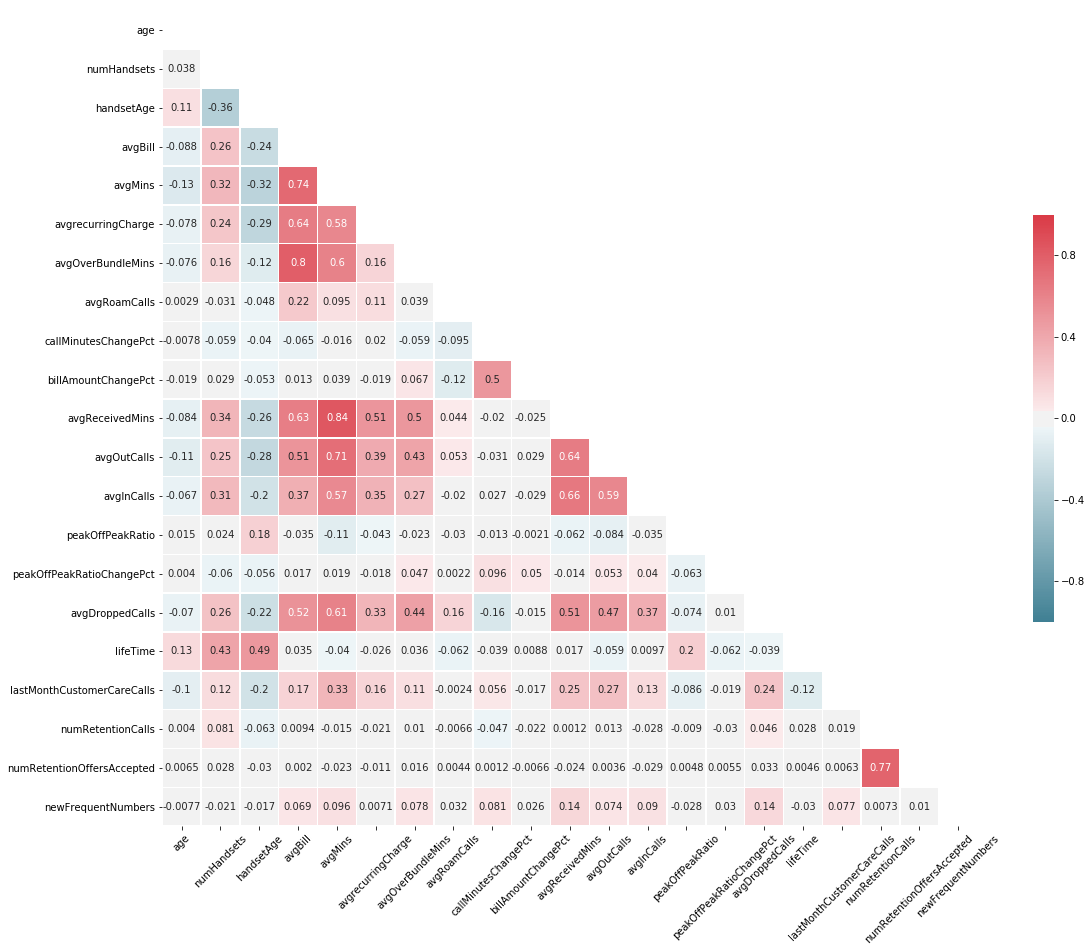

In [422]:
# Calculate correlation of all pairs of continuous features
corr = mydata_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In the following cells are the plots for pairs of continuous features which have been shown to have a high correlation above (The correlation coefficient>=0.65).

avgBill avgMins
avgBill avgOverBundleMins
avgMins avgReceivedMins
avgMins avgOutCalls
avgReceivedMins avgInCalls
numRetentionCalls numRetentionOffersAccepted


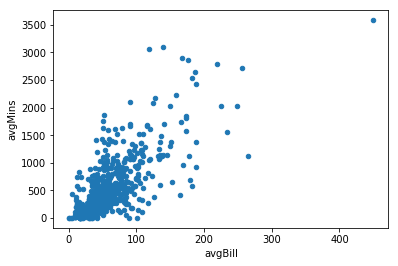

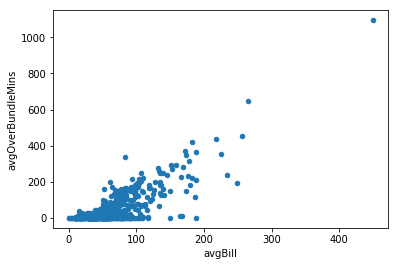

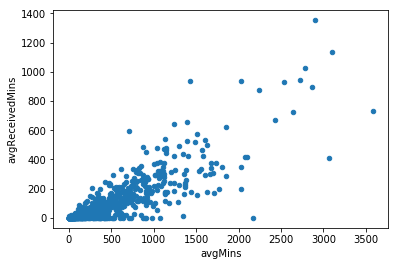

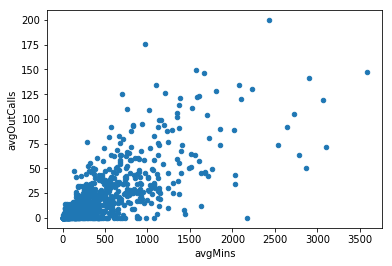

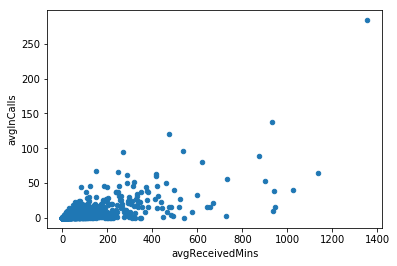

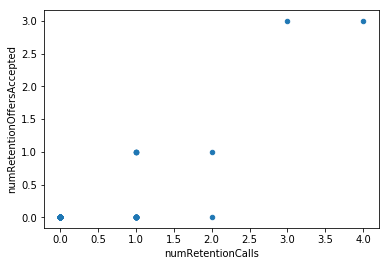

In [432]:
push_continuous_columns = continuous_columns.copy()
for i in range(len(continuous_columns)):
    push_continuous_columns.pop(0)
    for j in push_continuous_columns:
        if(mydata_train[[continuous_columns[i], j]].corr().as_matrix()[0,1] > 0.65):
            print(continuous_columns[i], j)
            mydata_train.plot(kind='scatter', x=continuous_columns[i], y=j)   

## Discussion:

Plots indicate that there are some feathers have a high correlation(The correlation coefficient>=0.65):

- avgBill avgMins
- avgBill avgMins
- avgBill avgOverBundleMins
- avgBill avgOverBundleMins
- avgMins avgReceivedMins
- avgMins avgReceivedMins
- avgMins avgOutCalls
- avgMins avgOutCalls
- avgReceivedMins avgInCalls
- avgReceivedMins avgInCalls
- numRetentionCalls numRetentionOffersAccepted
- numRetentionCalls numRetentionOffersAccepted

They seem to be linear correlation, for example: avgBill increased by 0.74, avgMin will increase by 1.
Thereforce, if I am going to pick one pair of them as my descriptive features, I will only pick one of them.


/Users/yaoxuanchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/yaoxuanchen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


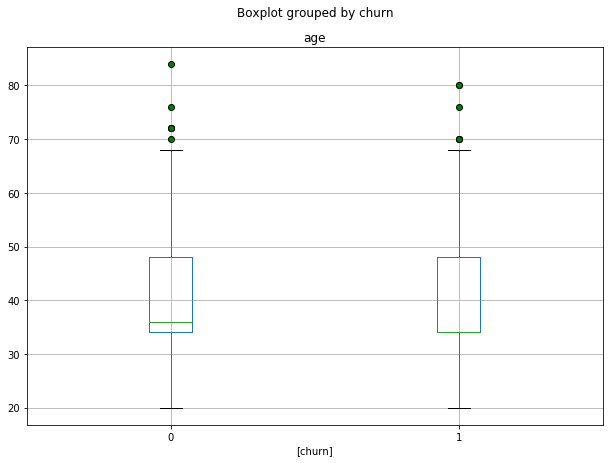

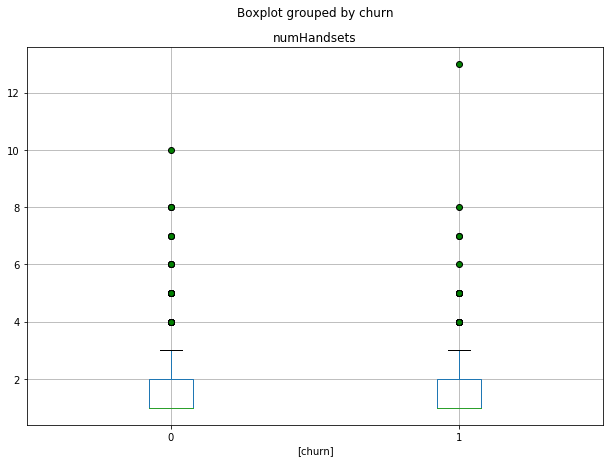

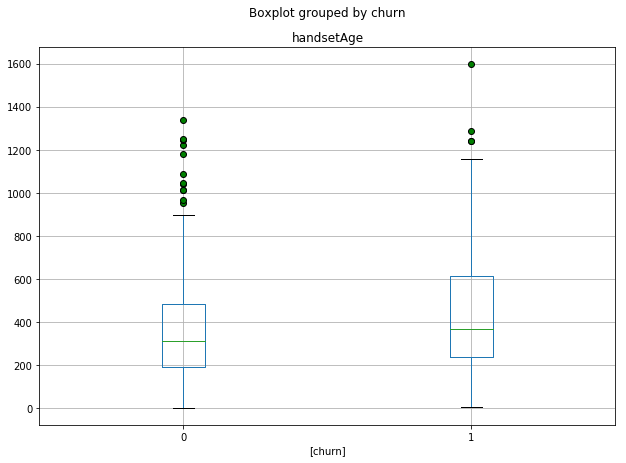

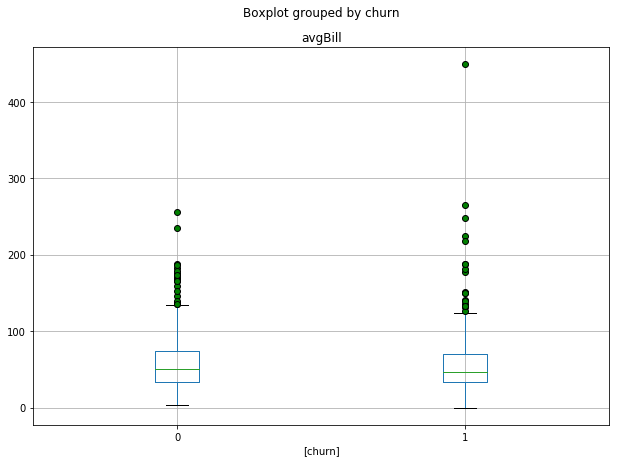

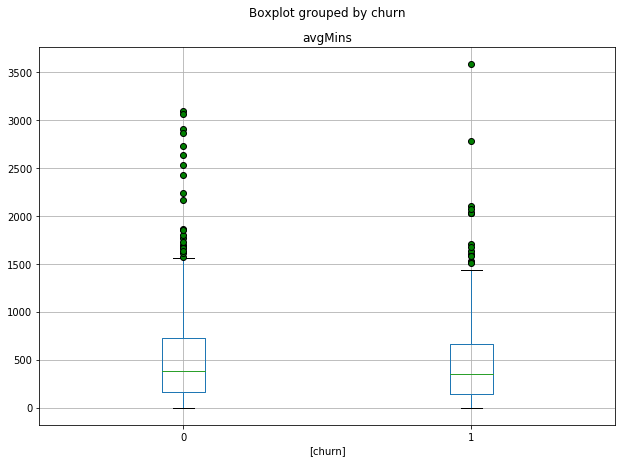

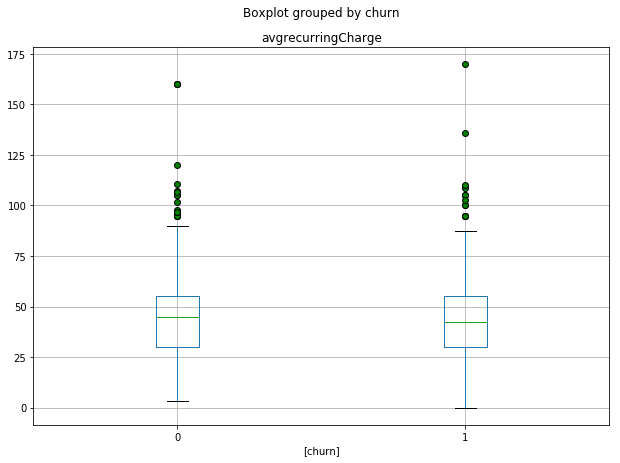

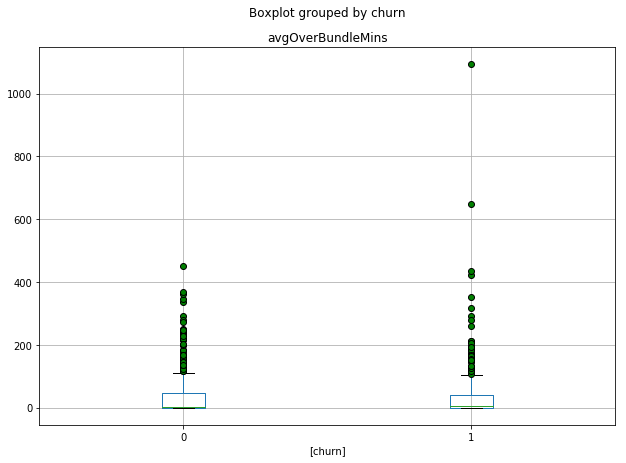

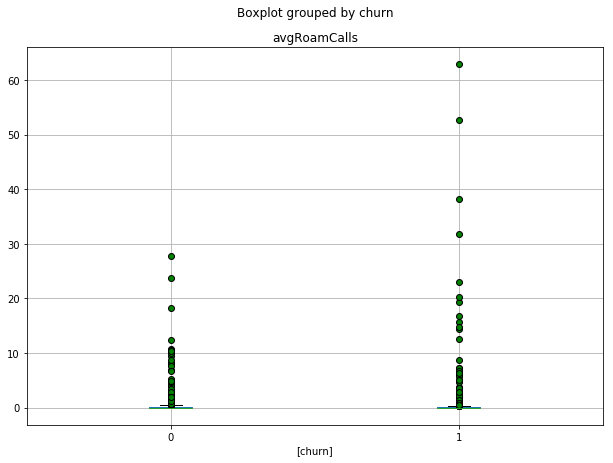

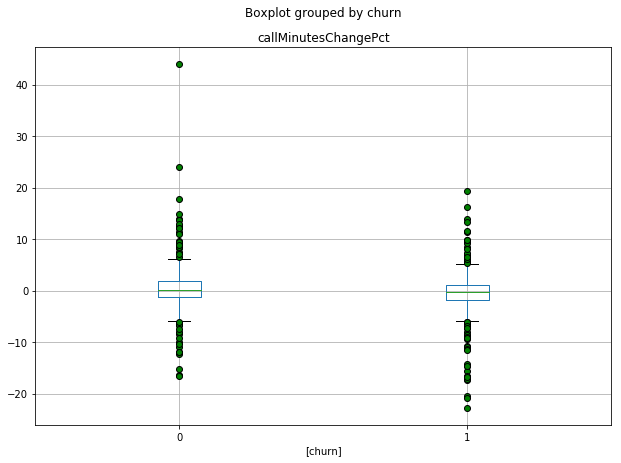

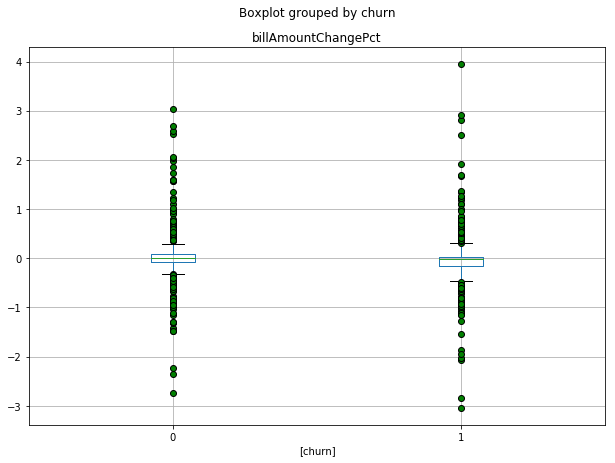

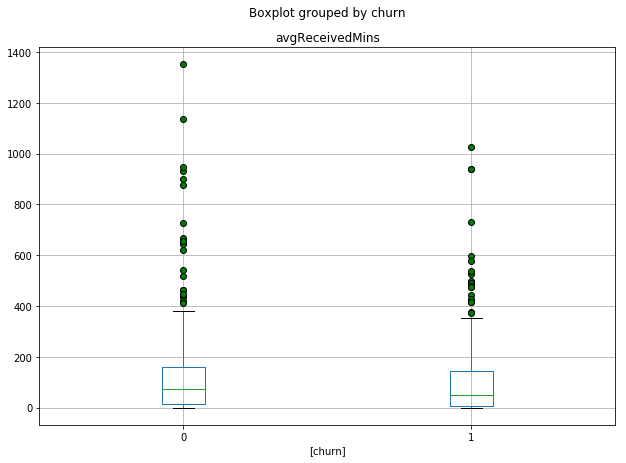

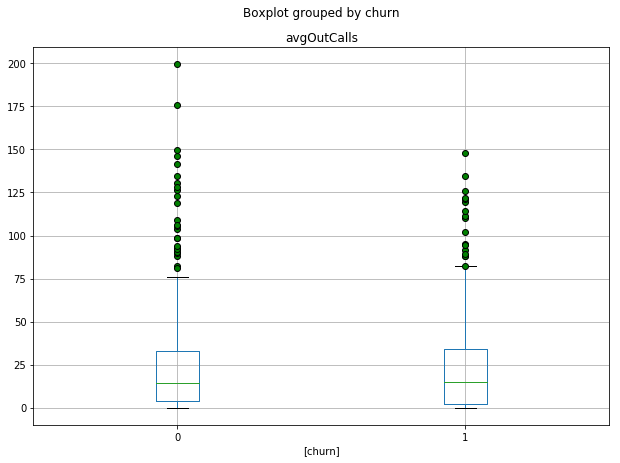

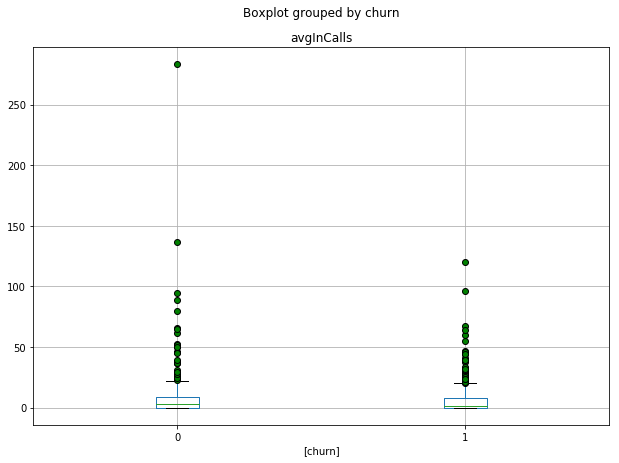

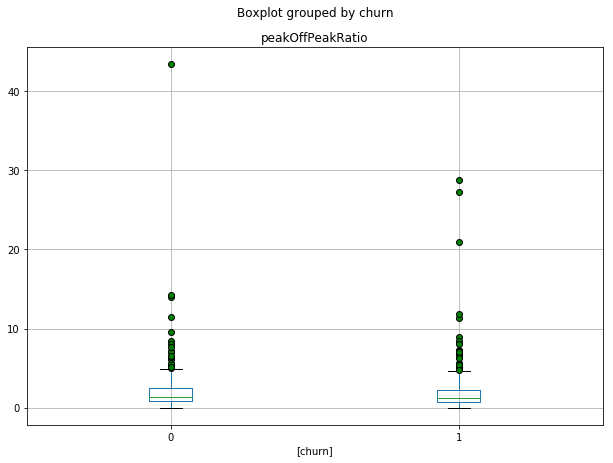

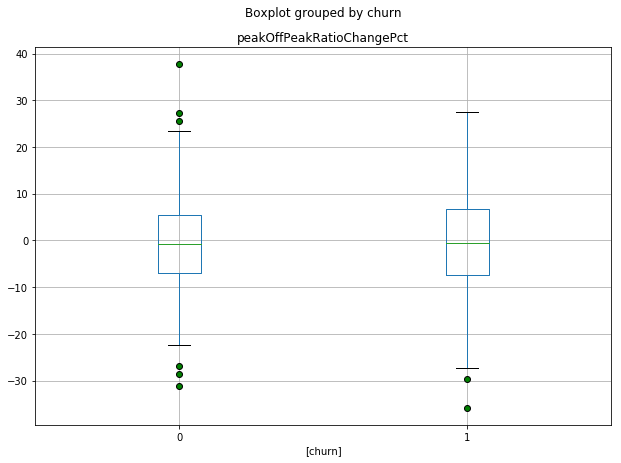

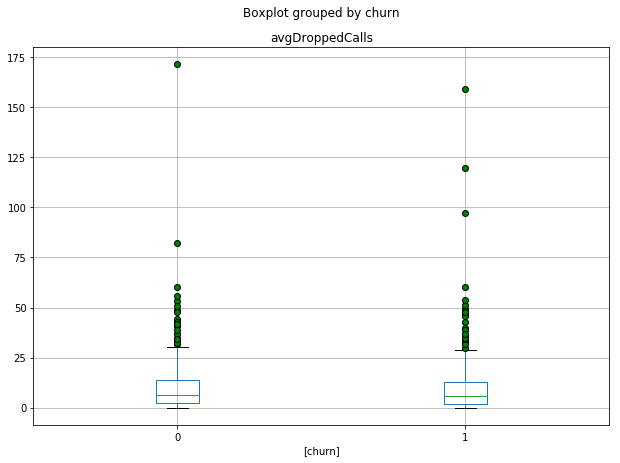

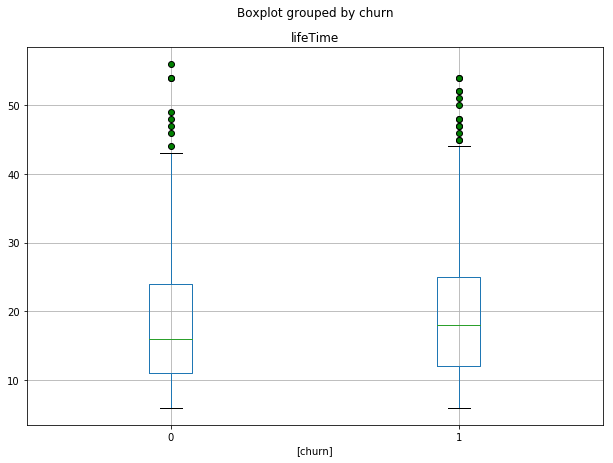

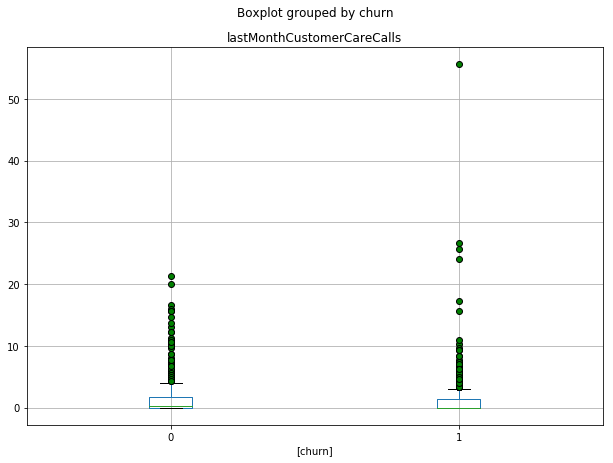

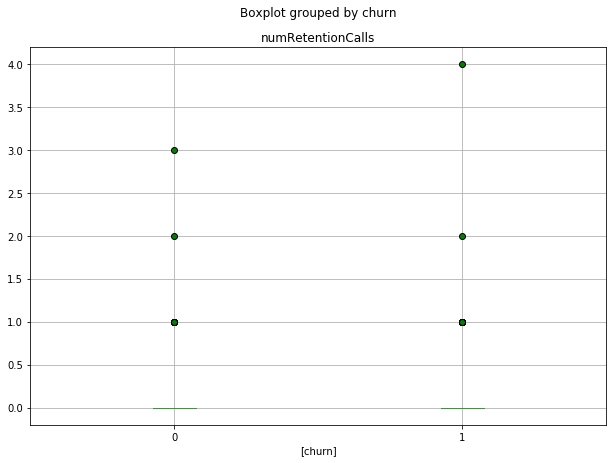

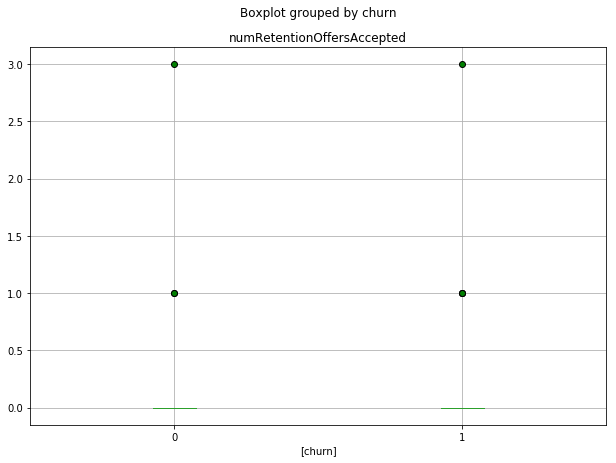

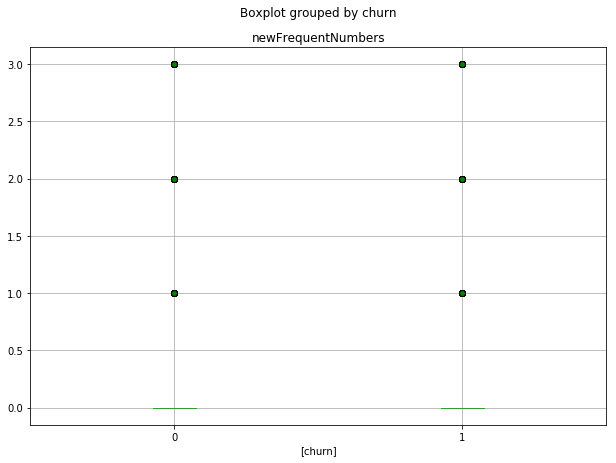

In [424]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
for col in continuous_columns:
    bp = mydata_train.boxplot(column=[col], by=['churn'], flierprops=flierprops, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16bfe3c8>]], dtype=object)

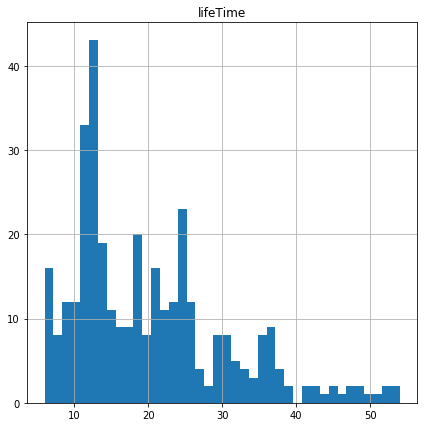

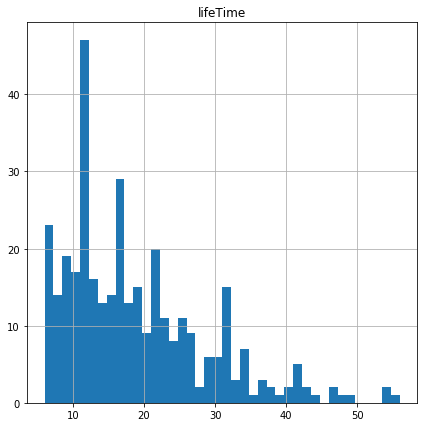

In [425]:
mydata_train[mydata_train['churn'] == True][['lifeTime']].hist(figsize=(7,7), bins=40)
mydata_train[mydata_train['churn'] == False][['lifeTime']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ccee940>]], dtype=object)

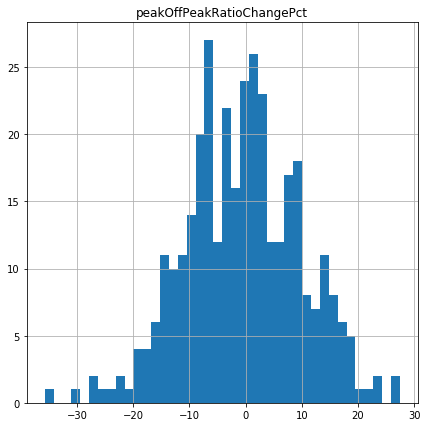

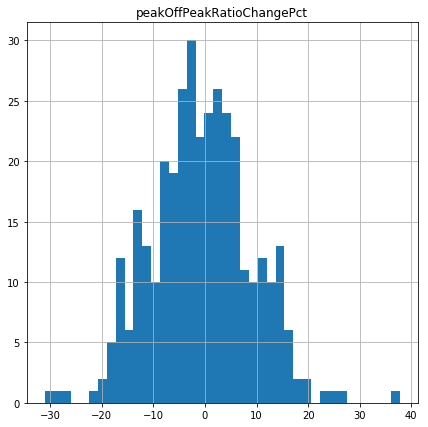

In [433]:
mydata_train[mydata_train['churn'] == True][['peakOffPeakRatioChangePct']].hist(figsize=(7,7), bins=40)
mydata_train[mydata_train['churn'] == False][['peakOffPeakRatioChangePct']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194f9ef0>]], dtype=object)

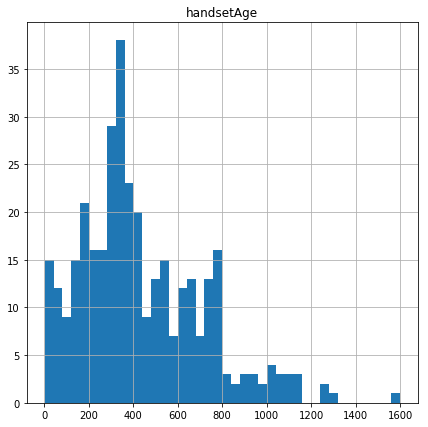

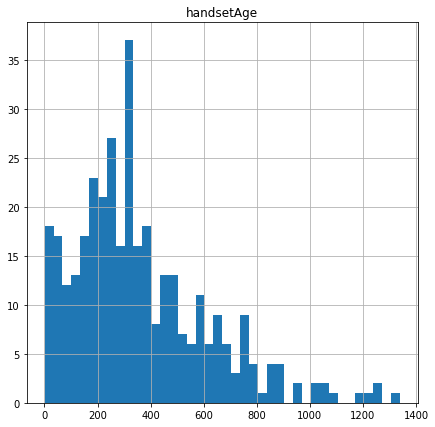

In [434]:
mydata_train[mydata_train['churn'] == True][['handsetAge']].hist(figsize=(7,7), bins=40)
mydata_train[mydata_train['churn'] == False][['handsetAge']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1478c0f0>]], dtype=object)

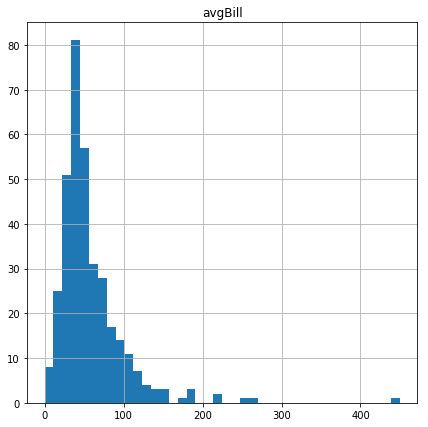

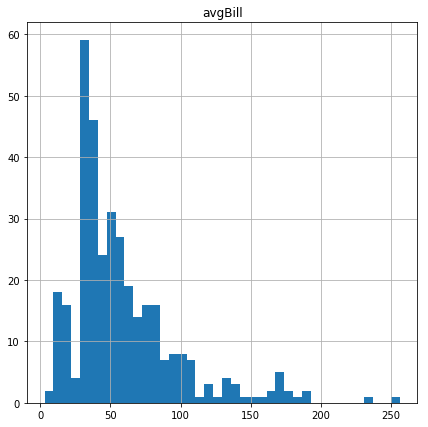

In [435]:
mydata_train[mydata_train['churn'] == True][['avgBill']].hist(figsize=(7,7), bins=40)
mydata_train[mydata_train['churn'] == False][['avgBill']].hist(figsize=(7,7), bins=40)

## Discussion:

According to the plots for Continuous - traget(churn) relationship, there are some features seem to be a slight related to churn. ("lifeTime", peakOffPeakRatioChangePct", "handsetAge", "avgBill")
People who have a long lifetime, high average over bundle minutes, high average bill, handset age are more likely to churn.

- lifetime
- peakOffPeakRatioChangePct
- handsetAge
- avgBill

So, I pick them as my descriptive features.

(0, 100)

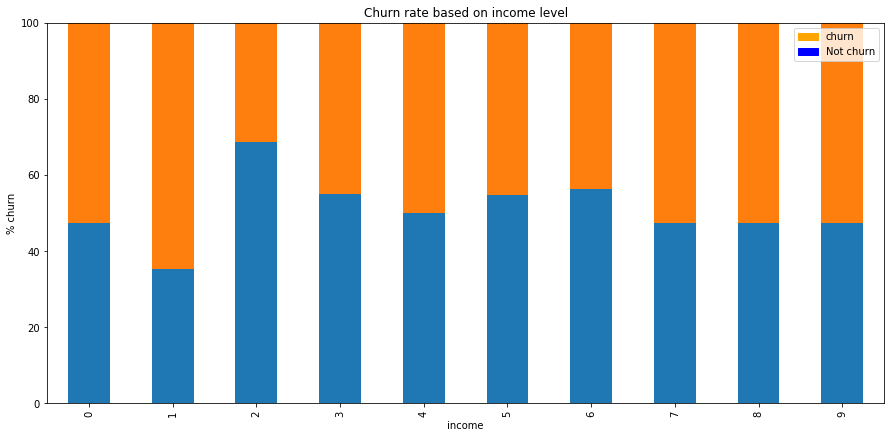

In [436]:
incomes = pd.unique(mydata_train.income.ravel())

mydata_train_picture = mydata_train.copy()
mydata_train_picture['percent'] = 0

for i in incomes:
    count = 1 / mydata_train_picture[mydata_train_picture.income == i].count()['churn']
    index_list = mydata_train_picture[mydata_train_picture['income'] == i].index.tolist()
    for ind in index_list:
        mydata_train_picture.loc[ind, 'percent'] = count * 100
        
group = mydata_train_picture[['percent','income','churn']].groupby(['income','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on income level", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("income")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

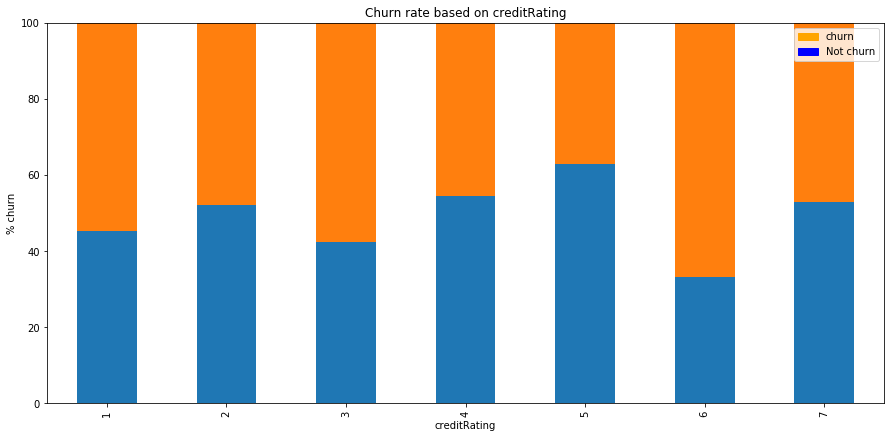

In [437]:
creditRatings = pd.unique(mydata_train.creditRating.ravel())

for i in creditRatings:
    count = 1 / mydata_train_picture[mydata_train_picture.creditRating == i].count()['churn']
    index_list = mydata_train_picture[mydata_train_picture['creditRating'] == i].index.tolist()
    for ind in index_list:
        mydata_train_picture.loc[ind, 'percent'] = count * 100
        
group = mydata_train_picture[['percent','creditRating','churn']].groupby(['creditRating','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on creditRating", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("creditRating")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

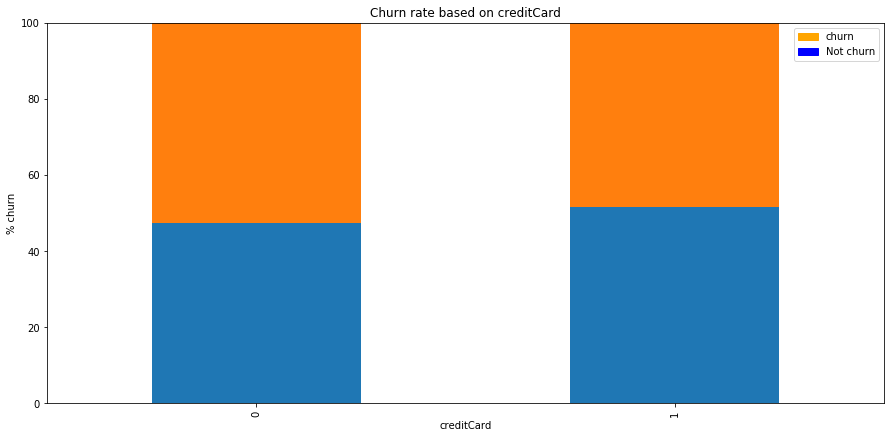

In [438]:
creditCards = pd.unique(mydata_train.creditCard.ravel())

for i in creditCards:
    count = 1 / mydata_train_picture[mydata_train_picture.creditCard == i].count()['churn']
    index_list = mydata_train_picture[mydata_train_picture['creditCard'] == i].index.tolist()
    for ind in index_list:
        mydata_train_picture.loc[ind, 'percent'] = count * 100
        
group = mydata_train_picture[['percent','creditCard','churn']].groupby(['creditCard','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on creditCard", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("creditCard")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

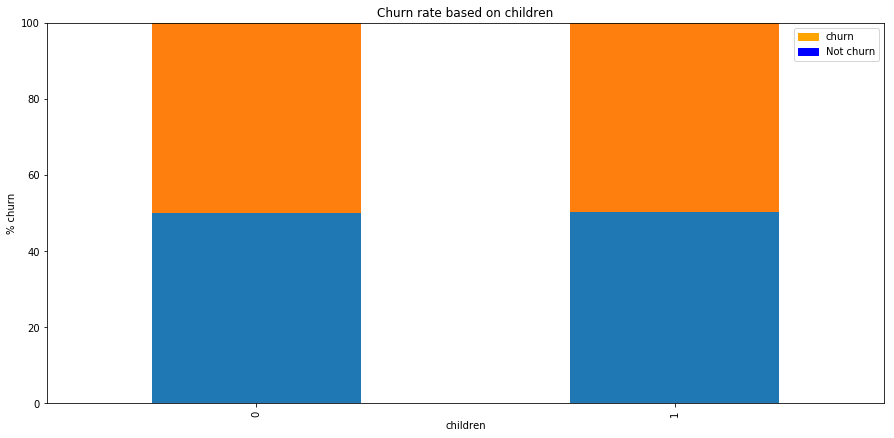

In [442]:
childrens = pd.unique(mydata_train.children.ravel())

for i in childrens:
    count = 1 / mydata_train_picture[mydata_train_picture.children == i].count()['churn']
    index_list = mydata_train_picture[mydata_train_picture['children'] == i].index.tolist()
    for ind in index_list:
        mydata_train_picture.loc[ind, 'percent'] = count * 100
        
group = mydata_train_picture[['percent','children','churn']].groupby(['children','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on children", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("children")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

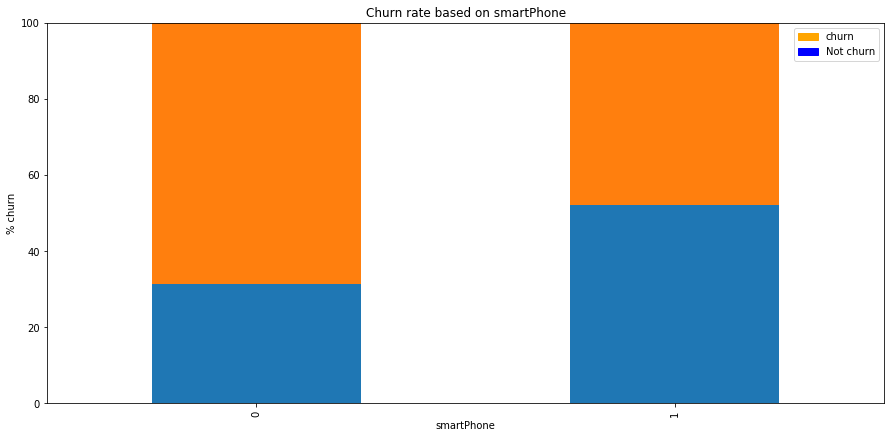

In [443]:
smartPhones = pd.unique(mydata_train.smartPhone.ravel())

for i in smartPhones:
    count = 1 / mydata_train_picture[mydata_train_picture.smartPhone == i].count()['churn']
    index_list = mydata_train_picture[mydata_train_picture['smartPhone'] == i].index.tolist()
    for ind in index_list:
        mydata_train_picture.loc[ind, 'percent'] = count * 100
        
group = mydata_train_picture[['percent','smartPhone','churn']].groupby(['smartPhone','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on smartPhone", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("smartPhone")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

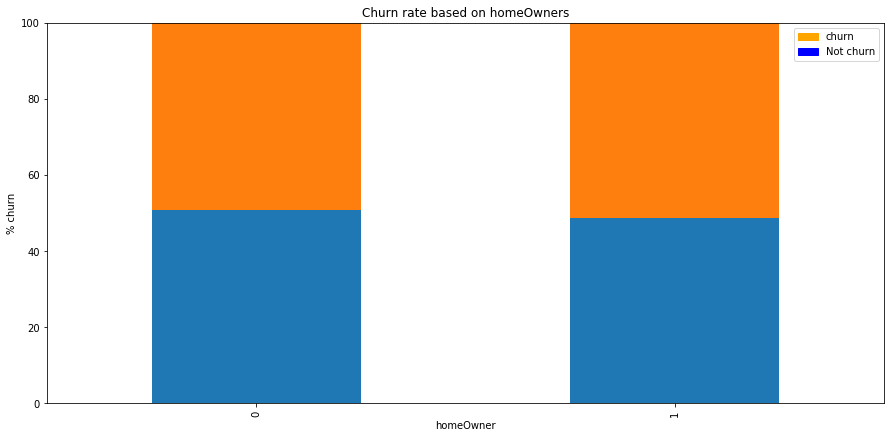

In [444]:
homeOwners = pd.unique(mydata_train.homeOwner.ravel())

for i in homeOwners:
    count = 1 / mydata_train_picture[mydata_train_picture.homeOwner == i].count()['churn']
    index_list = mydata_train_picture[mydata_train_picture['homeOwner'] == i].index.tolist()
    for ind in index_list:
        mydata_train_picture.loc[ind, 'percent'] = count * 100
        
group = mydata_train_picture[['percent','homeOwner','churn']].groupby(['homeOwner','churn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Churn rate based on homeOwners", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='Not churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("homeOwner")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

## Discussion: 

According to those above plots , it shows that 

people who do not own a smartphone slightly more likely to churn.
peole has a '6' credit rating seems like churn.
peole has a '5' credit rating seems like not churn.
peole has a '1' income seems like churn. Maybe they have multiple choice and want to change to another valuable plan.

Synthesize the idea that these particular features can affect the user experience and thus push the user towards a churn, and above correlation analysis，I chose these features as the descriptive features to predicte the target feature:

- smartPhone
- creditRating
- income

# 2. Predictive Modeling: Linear Regression.

As mentioned before, the following descriptive features will be put in my formation.

continuous features:

- avgBill
- lifeTime
- handsetAge
- peakOffPeakRatioChangePct


categorical features:

- smartPhone
- creditRating
- income



## (2.1) Set the model 

In [445]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# linear regression model.peakOffPeakRatioChangePct + handsetAge + income + smartPhone
lm = sm.ols(formula="churn ~ avgBill + lifeTime + peakOffPeakRatioChangePct + handsetAge + C(income) + C(smartPhone) +C(creditRating)", data=mydata_train).fit()

## (2.1) Set the model 

In [446]:
# Print the model weights/parameters
print(lm.params)

Intercept                    0.621202
C(income)[T.1]               0.070557
C(income)[T.2]              -0.229550
C(income)[T.3]              -0.092647
C(income)[T.4]              -0.012166
C(income)[T.5]              -0.085565
C(income)[T.6]              -0.129905
C(income)[T.7]              -0.024648
C(income)[T.8]              -0.035186
C(income)[T.9]              -0.035594
C(smartPhone)[T.1]          -0.145882
C(creditRating)[T.2]        -0.027554
C(creditRating)[T.3]         0.066904
C(creditRating)[T.4]        -0.047919
C(creditRating)[T.5]        -0.129223
C(creditRating)[T.6]         0.141890
C(creditRating)[T.7]        -0.037902
avgBill                      0.000109
lifeTime                    -0.000938
peakOffPeakRatioChangePct    0.000563
handsetAge                   0.000212
dtype: float64


In [375]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.911
Date:                Sun, 08 Apr 2018   Prob (F-statistic):            0.00969
Time:                        15:34:32   Log-Likelihood:                -488.88
No. Observations:                 700   AIC:                             1020.
Df Residuals:                     679   BIC:                             1115.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6212      0.116      5.352      0.000       0.393       0.849
C(income)[T.1]                0.0706      0.094      0.753      0.452      -0.113       0.254
C(income)[T.2]               -0.2296      0.130     -1.764      0.078      -0.485       0.026
C(income)[T.3]               -0.0926      0.087     -1.064      0.288      -0.264       0.078
C(income)[T.4]               -0.0122      0.086     -0.142      0.887      -0.180       0.156
C(income)[T.5]               -0.0856      0.074     -1.157      0.248      -0.231       0.060
C(income)[T.6]               -0.1299      0.058     -2.224      0.026      -0.245      -0.015
C(income)[T.7]               -0.0246      0.069     -0.357      0.721      -0.160       0.111
C(income)[T.8]               -0.0352      0.089     -0.394      0.694      -0.210       0.140
C(income)[T.9]               -0.0356      0.071     -0.499      0.618      -0.176       0.104
C(smartPhone)[T.1]           -0.1459      0.070     -2.091      0.037      -0.283      -0.009
C(creditRating)[T.2]         -0.0276      0.062     -0.445      0.656      -0.149       0.094
C(creditRating)[T.3]          0.0669      0.067      1.001      0.317      -0.064       0.198
C(creditRating)[T.4]         -0.0479      0.084     -0.573      0.567      -0.212       0.116
C(creditRating)[T.5]         -0.1292      0.077     -1.674      0.095      -0.281       0.022
C(creditRating)[T.6]          0.1419      0.127      1.118      0.264      -0.107       0.391
C(creditRating)[T.7]         -0.0379      0.103     -0.368      0.713      -0.240       0.164
avgBill                       0.0001      0.000      0.222      0.824      -0.001       0.001
lifeTime                     -0.0009      0.002     -0.382      0.703      -0.006       0.004
peakOffPeakRatioChangePct     0.0006      0.002      0.300      0.765      -0.003       0.004
handsetAge                    0.0002   8.88e-05      2.386      0.017    3.75e-05       0.000
==============================================================================
Omnibus:                        0.032   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.984   Jarque-Bera (JB):               93.523
Skew:                           0.016   Prob(JB):                     4.92e-21
Kurtosis:                       1.210   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Discussion:

## (3) Testing the model by train set

In [376]:
print(lm.predict(mydata_train).head(100))
churnClass=(lm.predict(mydata_train)>0.5)*1.0
mydata_churnClass = pd.DataFrame({'churnClass': churnClass})

148    0.396558
966    0.505741
933    0.277474
479    0.494246
36     0.518269
468    0.579965
375    0.317631
950    0.384059
806    0.410858
928    0.704780
461    0.601203
419    0.484297
43     0.514645
599    0.480491
313    0.413580
255    0.384457
565    0.405936
380    0.574244
607    0.467634
264    0.487488
184    0.400285
371    0.460631
739    0.488872
96     0.421416
254    0.502334
161    0.674914
404    0.399762
723    0.453477
88     0.510070
294    0.349605
         ...   
440    0.569866
543    0.447317
236    0.463424
212    0.447389
654    0.429297
733    0.466916
648    0.573223
469    0.457134
135    0.564627
606    0.473117
712    0.681777
900    0.626067
701    0.461013
869    0.413456
283    0.482153
962    0.589140
185    0.477278
742    0.466786
906    0.489576
601    0.445680
521    0.486501
12     0.399375
338    0.250941
400    0.452993
339    0.273469
460    0.466178
817    0.271544
727    0.432285
222    0.383009
523    0.486047
Length: 100, dtype: floa

In [377]:
mydata_churnClass.head(100)

,churnClass
148,0.0
966,1.0
933,0.0
479,0.0
36,1.0
468,1.0
375,0.0
950,0.0
806,0.0
928,1.0


In [378]:
predict_mydata_train = pd.DataFrame({'ActualChrun': mydata_train.churn, 'PredictedChurn': churnClass, "Actual - Predicted":(mydata_train['churn'] -  churnClass)})
print(predict_mydata_train.head(100))

     Actual - Predicted  ActualChrun  PredictedChurn
148                 0.0            0             0.0
966                -1.0            0             1.0
933                 0.0            0             0.0
479                 0.0            0             0.0
36                 -1.0            0             1.0
468                -1.0            0             1.0
375                 1.0            1             0.0
950                 1.0            1             0.0
806                 0.0            0             0.0
928                 0.0            1             1.0
461                -1.0            0             1.0
419                 0.0            0             0.0
43                  0.0            1             1.0
599                 1.0            1             0.0
313                 0.0            0             0.0
255                 0.0            0             0.0
565                 1.0            1             0.0
380                 0.0            1          

In [379]:
print("\n(Actual - Predicted) squared:\n", ((mydata_train['churn'] -  churnClass)** 2).mean())

print("\nMean Absolute Error:\n", (abs(mydata_train['churn'] -  churnClass).mean()))


(Actual - Predicted) squared:
 0.3842857142857143

Mean Absolute Error:
 0.3842857142857143


In [447]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(mydata_train['churn'], churnClass))
print("Confusion matrix: \n", metrics.confusion_matrix(mydata_train['churn'], churnClass))
print("Classification report:\n ", metrics.classification_report(mydata_train['churn'], churnClass))

Accuracy:  0.615714285714
Confusion matrix: 
 [[232 119]
 [150 199]]
Classification report:
               precision    recall  f1-score   support

          0       0.61      0.66      0.63       351
          1       0.63      0.57      0.60       349

avg / total       0.62      0.62      0.61       700



### Discussion:

After using the train set to test the model, the accuracy reached 0.615714285714. It means that In our case we have 700 examples and the predictions is correct on about 428 of them.

The squared is 0.3842857142857143. And for the value of churn are trun and false, so the Mean Absolute Error is the same value.

precision = TP/(TP + FP) : 0.61 of not churn precision means that when we predict 100 people not churn, there are 61 people not churn indeed. 

recall = TP/(TP + FN) : 0.66 means we do find out 66 not churn people in 100 not churn people.

f1: it take both the precision p and the recall r into consideration. 

Overall, the model is slightly better at predicting 'not churn' class than 'churn' class.

## (4) Evaluate the model

### using classification evaluation measures on the hold-out (30% examples) test set

In [381]:
churnClass_test=(lm.predict(mydata_test)>0.5)*1.0
mydata_churnClass_test = pd.DataFrame({'churnClass': churnClass_test})

In [382]:
predict_mydata_train_test = pd.DataFrame({'ActualChrun': mydata_test.churn, 'PredictedChurn': churnClass_test, "Actual - Predicted":(mydata_test['churn'] -  churnClass_test)})
print(predict_mydata_train_test.head(100))

     Actual - Predicted  ActualChrun  PredictedChurn
128                 1.0            1             0.0
621                 0.0            1             1.0
558                 1.0            1             0.0
772                 0.0            0             0.0
244                 0.0            0             0.0
873                 0.0            1             1.0
301                -1.0            0             1.0
689                 0.0            0             0.0
949                -1.0            0             1.0
175                 0.0            0             0.0
913                 0.0            1             1.0
28                  1.0            1             0.0
904                 0.0            1             1.0
126                 1.0            1             0.0
858                 1.0            1             0.0
13                 -1.0            0             1.0
119                 0.0            0             0.0
728                -1.0            0          

In [383]:
print("\n(Actual - Predicted) squared:\n", ((mydata_test['churn'] -  churnClass_test)** 2).mean())

print("\nMean Absolute Error:\n", (abs(mydata_test['churn'] -  churnClass_test).mean()))


(Actual - Predicted) squared:
 0.41

Mean Absolute Error:
 0.41


In [384]:
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(mydata_test['churn'], churnClass_test))
print("Confusion matrix: \n", metrics.confusion_matrix(mydata_test['churn'], churnClass_test))
print("Classification report:\n ", metrics.classification_report(mydata_test['churn'], churnClass_test))

Accuracy:  0.59
Confusion matrix: 
 [[94 59]
 [64 83]]
Classification report:
               precision    recall  f1-score   support

          0       0.59      0.61      0.60       153
          1       0.58      0.56      0.57       147

avg / total       0.59      0.59      0.59       300



### Compare results with training  dataset:

## Testing on mydata (all of data)

In [385]:
churnClass_all =(lm.predict(mydata)>0.5)*1.0
mydata_churnClass_all = pd.DataFrame({'churnClass': churnClass_all})

In [386]:
predict_mydata = pd.DataFrame({'ActualChrun': mydata.churn, 'PredictedChurn': churnClass_all, "Actual - Predicted":(mydata['churn'] - churnClass_all)})
print(predict_mydata.head(100))

     Actual - Predicted  ActualChrun  PredictedChurn
148                 0.0            0             0.0
966                -1.0            0             1.0
933                 0.0            0             0.0
479                 0.0            0             0.0
36                 -1.0            0             1.0
468                -1.0            0             1.0
375                 1.0            1             0.0
950                 1.0            1             0.0
806                 0.0            0             0.0
928                 0.0            1             1.0
461                -1.0            0             1.0
419                 0.0            0             0.0
43                  0.0            1             1.0
599                 1.0            1             0.0
313                 0.0            0             0.0
255                 0.0            0             0.0
565                 1.0            1             0.0
380                 0.0            1          

In [387]:
print("\n(Actual - Predicted) squared:\n", ((mydata['churn'] -  churnClass_all)** 2).mean())
print("\nMean Absolute Error:\n", (abs(mydata['churn'] -  churnClass_all).mean()))


(Actual - Predicted) squared:
 0.392

Mean Absolute Error:
 0.392


In [388]:
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(mydata['churn'], churnClass_all))
print("Confusion matrix: \n", metrics.confusion_matrix(mydata['churn'], churnClass_all))
print("Classification report:\n ", metrics.classification_report(mydata['churn'], churnClass_all))

print(mydata.dtypes)

Accuracy:  0.608
Confusion matrix: 
 [[326 178]
 [214 282]]
Classification report:
               precision    recall  f1-score   support

          0       0.60      0.65      0.62       504
          1       0.61      0.57      0.59       496

avg / total       0.61      0.61      0.61      1000

age                              int64
children                      category
income                        category
numHandsets                      int64
handsetAge                       int64
smartPhone                    category
creditRating                     int64
homeOwner                     category
creditCard                    category
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float6

## Model evaluation: Training versus test error

## Model evaluation using cross-validation (several out-of-sample datasets with a 70% train and 30% test split)

In [389]:
from sklearn.cross_validation import KFold
kf=KFold(n=1000, n_folds=10, shuffle=True)
cross_train = []
cross_test = []
for i,(train_index,test_index) in enumerate(kf):
    cross_train.append(mydata.loc[train_index])
    cross_test.append(mydata.loc[test_index])
Actual_Predicted_squared = 0
Mean_Absolute_Error = 0
cross_Accuracy = 0
Confusion_matrix = np.array([[0, 0], [0, 0]])

for i in range(10):
    cross_train1 = cross_train[i].copy()
    cross_test1 = cross_test[i].copy()
    cross_train1['churn'] = cross_train1['churn'].astype('int')
    cross_test1['churn'] = cross_test1['churn'].astype('int')
    # linear regression model.peakOffPeakRatioChangePct + handsetAge + income + smartPhone
    lm_cross_train1 = sm.ols(formula="churn ~ lifeTime + peakOffPeakRatioChangePct + handsetAge + C(income) + C(smartPhone)", data=cross_train1).fit()
    # Print the model weights/parameters
    print(lm_cross_train1.params)
    print(lm_cross_train1.summary())
    churnClass_cross_test1 =(lm_cross_train1.predict(cross_test1)>0.5)*1.0
    cross_churnClass_all = pd.DataFrame({'churnClass': churnClass_cross_test1})
    predict_cross_test1 = pd.DataFrame({'ActualChrun': cross_test1.churn, 'PredictedChurn': churnClass_cross_test1, "Actual - Predicted":(cross_test1['churn'] -  churnClass_cross_test1)})
    Actual_Predicted_squared += ((cross_test1['churn'] -  churnClass_cross_test1)** 2).mean()
    print("\n(Actual - Predicted) squared:", ((cross_test1['churn'] -  churnClass_cross_test1)** 2).mean())
    Mean_Absolute_Error += (abs(cross_test1['churn'] -  churnClass_cross_test1).mean())
    print("\nMean Absolute Error:", (abs(cross_test1['churn'] -  churnClass_cross_test1).mean()))
    # Some more evaluation metrics.
    cross_Accuracy += metrics.accuracy_score(cross_test1['churn'], churnClass_cross_test1)
    print("\nAccuracy: ", metrics.accuracy_score(cross_test1['churn'], churnClass_cross_test1))
    Confusion_matrix += np.asarray(metrics.confusion_matrix(cross_test1['churn'], churnClass_cross_test1))
    print("\nConfusion matrix: \n", metrics.confusion_matrix(cross_test1['churn'], churnClass_cross_test1)) 
    print("Classification report:\n ", metrics.classification_report(cross_test1['churn'], churnClass_cross_test1))
    
print("\n(Actual - Predicted) squared:\n", Actual_Predicted_squared/10)
print("\nMean Absolute Error:\n", Mean_Absolute_Error/10)
print("\nAccuracy: ", cross_Accuracy/10)
print("\nConfusion matrix: \n", Confusion_matrix/10)

Intercept                    0.623766
C(income)[T.1]               0.006946
C(income)[T.2]              -0.263466
C(income)[T.3]              -0.089481
C(income)[T.4]              -0.047099
C(income)[T.5]              -0.067187
C(income)[T.6]              -0.066539
C(income)[T.7]              -0.018139
C(income)[T.8]              -0.023663
C(income)[T.9]              -0.014094
C(smartPhone)[T.1]          -0.149383
lifeTime                    -0.003334
peakOffPeakRatioChangePct    0.003010
handsetAge                   0.000272
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.905
Date:                Sun, 08 Apr 2018   Prob (F-statistic):           0.000384
Time:                        15:34:41   Log-Likelihood:   

               precision    recall  f1-score   support

          0       0.53      0.71      0.61        49
          1       0.59      0.39      0.47        51

avg / total       0.56      0.55      0.54       100

Intercept                    0.543021
C(income)[T.1]               0.048716
C(income)[T.2]              -0.292157
C(income)[T.3]              -0.050527
C(income)[T.4]              -0.075389
C(income)[T.5]              -0.092249
C(income)[T.6]              -0.069960
C(income)[T.7]              -0.034712
C(income)[T.8]              -0.064490
C(income)[T.9]               0.014280
C(smartPhone)[T.1]          -0.101903
lifeTime                    -0.001620
peakOffPeakRatioChangePct    0.001714
handsetAge                   0.000279
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.028

## Multiple logistic regression (using more than one feature)
### Training the model

In [390]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score


intercept = pd.DataFrame({'Intercept': np.ones(1000)})
print(intercept.shape)
mydata['churn'] = mydata['churn'].astype('int')
mydata['creditRating'] = mydata['creditRating'].astype('int')
print(mydata.dtypes)

(1000, 1)
age                              int64
children                      category
income                        category
numHandsets                      int64
handsetAge                       int64
smartPhone                    category
creditRating                     int64
homeOwner                     category
creditCard                    category
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct      float64
avgDroppedCalls                float64
lifeTime                         int64
lastMonthCustomerCareCalls     float64
numRetentionCalls                int64
numRetentionOff

In [394]:
# Prepare the descriptive features
X = pd.concat([intercept, mydata[['lifeTime', 'avgBill', 'peakOffPeakRatioChangePct', 'handsetAge', 'income', 'smartPhone', 'creditRating']]], axis=1)
y = mydata.churn
print("Descriptive features:\n", X.head(10))
print("\nTarget feature:\n", y.head(10))

Descriptive features:
    Intercept  lifeTime  avgBill  peakOffPeakRatioChangePct  handsetAge income  \
0        1.0        14    99.45                 -11.700647         421      7   
1        1.0        21    33.42                  13.662191         587      7   
2        1.0        11    57.86                  19.364133         337      1   
3        1.0         8    83.97                  -5.010550         240      7   
4        1.0        16    47.93                  -7.030517         484      0   
5        1.0        31    35.49                  -4.139893         154      1   
6        1.0        20    77.00                  -1.389821         195      7   
7        1.0        14    31.69                   6.245733         428      7   
8        1.0        13    44.34                  15.028793         378      1   
9        1.0        12   265.04                   4.466428         337      4   

  smartPhone  creditRating  
0          1             5  
1          1             2 

In [395]:
# Split the data into train and test sets
# Take a third (random) data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

##2.3 test on sample

In [396]:
# Train on the training sample 
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[  4.88855109e-01  -1.49011622e-02  -8.52689065e-05  -7.40719917e-04
    2.47392566e-04   1.20254988e-02  -4.79914938e-01  -1.57292850e-01]]


In [397]:
# Estimated class probabilities on train set
print(logreg_train.predict_proba(X_train)[:100])

[[ 0.56871943  0.43128057]
 [ 0.47487214  0.52512786]
 [ 0.45992168  0.54007832]
 [ 0.52017105  0.47982895]
 [ 0.45514792  0.54485208]
 [ 0.49815235  0.50184765]
 [ 0.35173824  0.64826176]
 [ 0.50345986  0.49654014]
 [ 0.3773598   0.6226402 ]
 [ 0.47227109  0.52772891]
 [ 0.45788108  0.54211892]
 [ 0.53240693  0.46759307]
 [ 0.60007367  0.39992633]
 [ 0.49219553  0.50780447]
 [ 0.64227993  0.35772007]
 [ 0.46709421  0.53290579]
 [ 0.40111984  0.59888016]
 [ 0.43724691  0.56275309]
 [ 0.48043814  0.51956186]
 [ 0.60212224  0.39787776]
 [ 0.50142001  0.49857999]
 [ 0.48211055  0.51788945]
 [ 0.59062518  0.40937482]
 [ 0.49480982  0.50519018]
 [ 0.47272119  0.52727881]
 [ 0.54863832  0.45136168]
 [ 0.59529555  0.40470445]
 [ 0.55054571  0.44945429]
 [ 0.49757314  0.50242686]
 [ 0.45512937  0.54487063]
 [ 0.63367398  0.36632602]
 [ 0.45270463  0.54729537]
 [ 0.58336554  0.41663446]
 [ 0.6059388   0.3940612 ]
 [ 0.46600311  0.53399689]
 [ 0.45722841  0.54277159]
 [ 0.49186982  0.50813018]
 

In [398]:
# Estimated classes  on test set
y_predicted_train = logreg_train.predict(X_train)
print(y_predicted_train[:100])

[0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0]


In [399]:
# Some more evaluation metrics.
log_train_Accuracy = metrics.accuracy_score(y_train, y_predicted_train)
print("Accuracy: ", log_train_Accuracy)
log_train_ConMatrix =  metrics.confusion_matrix(y_train, y_predicted_train)
print("Confusion matrix: \n",log_train_ConMatrix)
print("Classification report:\n ", metrics.classification_report(y_train, y_predicted_train))

Accuracy:  0.56
Confusion matrix: 
 [[198 160]
 [148 194]]
Classification report:
               precision    recall  f1-score   support

          0       0.57      0.55      0.56       358
          1       0.55      0.57      0.56       342

avg / total       0.56      0.56      0.56       700



In [400]:
log_train_f1 = metrics.f1_score(y_train, y_predicted_train)
print("f1 :", log_train_f1)

f1 : 0.557471264368


# test

In [401]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test)[:100])

[[ 0.49886892  0.50113108]
 [ 0.45539319  0.54460681]
 [ 0.51047277  0.48952723]
 [ 0.49546126  0.50453874]
 [ 0.45206107  0.54793893]
 [ 0.58905004  0.41094996]
 [ 0.53409281  0.46590719]
 [ 0.51593074  0.48406926]
 [ 0.66048265  0.33951735]
 [ 0.45116087  0.54883913]
 [ 0.47368536  0.52631464]
 [ 0.4573944   0.5426056 ]
 [ 0.48520023  0.51479977]
 [ 0.51181749  0.48818251]
 [ 0.54454081  0.45545919]
 [ 0.49363872  0.50636128]
 [ 0.46959745  0.53040255]
 [ 0.57763864  0.42236136]
 [ 0.48258348  0.51741652]
 [ 0.55290874  0.44709126]
 [ 0.64267674  0.35732326]
 [ 0.49805386  0.50194614]
 [ 0.50576311  0.49423689]
 [ 0.4939986   0.5060014 ]
 [ 0.47722103  0.52277897]
 [ 0.44576135  0.55423865]
 [ 0.61299873  0.38700127]
 [ 0.50179803  0.49820197]
 [ 0.47253126  0.52746874]
 [ 0.45854252  0.54145748]
 [ 0.48989647  0.51010353]
 [ 0.36485427  0.63514573]
 [ 0.50038434  0.49961566]
 [ 0.57525917  0.42474083]
 [ 0.43419286  0.56580714]
 [ 0.45019317  0.54980683]
 [ 0.67765095  0.32234905]
 

In [402]:
# Estimated classes  on test set
y_predicted_test = logreg_train.predict(X_test)
print(y_predicted_test[:100])

[1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0]


In [403]:
# Some more evaluation metrics.
log_test_Accuracy = metrics.accuracy_score(y_test, y_predicted_test)
print("Accuracy: ", log_test_Accuracy)
log_test_ConMatrix =  metrics.confusion_matrix(y_test, y_predicted_test)
print("Confusion matrix: \n",log_test_ConMatrix)
print("Classification report:\n ", metrics.classification_report(y_test, y_predicted_test))

Accuracy:  0.48
Confusion matrix: 
 [[69 77]
 [79 75]]
Classification report:
               precision    recall  f1-score   support

          0       0.47      0.47      0.47       146
          1       0.49      0.49      0.49       154

avg / total       0.48      0.48      0.48       300



In [404]:
log_test_f1 = metrics.f1_score(y_test, y_predicted_test)
print("f1 :", log_test_f1)

f1 : 0.490196078431


#all

In [405]:
# Predict using the trained model, on in-sample data (same sample used for training and test)
all_predictions = logreg_train.predict(X)
print("Predictions: ", predictions[:100])

Predictions:  [1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1]


In [406]:
# Some more evaluation metrics.
log_all_Accuracy = metrics.accuracy_score(y, all_predictions)
print("Accuracy: ", log_all_Accuracy)
log_all_ConMatrix =  metrics.confusion_matrix(y, all_predictions)
print("Confusion matrix: \n",log_all_ConMatrix)
print("Classification report:\n ", metrics.classification_report(y, all_predictions))

Accuracy:  0.536
Confusion matrix: 
 [[267 237]
 [227 269]]
Classification report:
               precision    recall  f1-score   support

          0       0.54      0.53      0.54       504
          1       0.53      0.54      0.54       496

avg / total       0.54      0.54      0.54      1000



In [407]:
log_all_f1 = metrics.f1_score(y, all_predictions)
print("f1 :", log_all_f1)

f1 : 0.536926147705


## Model evaluation using cross-validation (several out-of-sample datasets with a 70% train and 30% test split)

In [408]:
# Evaluate the model using 3-fold cross-validation.
# Uses 2 thirds of data for training and the last third for testing. 
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=10)
print(scores)
print(scores.mean())

[ 0.55238095  0.62385321  0.54867257  0.40425532  0.47706422  0.52525253
  0.52        0.59793814  0.55855856  0.45360825]
0.526158374466


In [409]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.53465347  0.59405941  0.4950495   0.44554455  0.43        0.53
  0.51515152  0.60606061  0.50505051  0.46464646]
0.51202160216
